Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 1.6992
Epoch [2/10], Loss: 1.4025
Epoch [3/10], Loss: 1.2864
Epoch [4/10], Loss: 1.1931
Epoch [5/10], Loss: 1.1118
Epoch [6/10], Loss: 1.0373
Epoch [7/10], Loss: 0.9716
Epoch [8/10], Loss: 0.9134
Epoch [9/10], Loss: 0.8628
Epoch [10/10], Loss: 0.8148
Test Accuracy: 70.14%
Test Loss: 0.8563


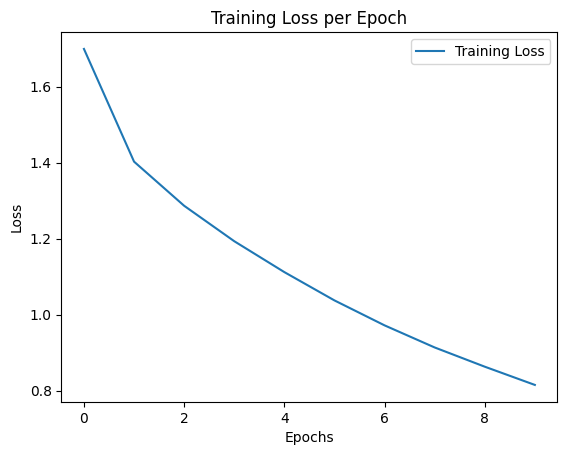

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

# Define data transformations
t = transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load CIFAR-10 dataset
train_data = CIFAR10(root='./cifar', train=True, download=True, transform=t)
test_data = CIFAR10(root='./cifar', train=False, download=True, transform=t)

# Data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define CNN model
class cnn_model(nn.Module):
    def __init__(self):
        super(cnn_model, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.fc1 = nn.Linear(128*4*4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.pool(F.relu(self.conv2(x)))   
        x = self.pool(F.relu(self.conv3(x)))   
        x = x.view(-1, 128*4*4)  # Flatten the output for fully connected layers
        x = torch.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss function, and optimizer
model = cnn_model()
criterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model
num_epochs = 10
train_losses = []  # To store loss for plotting

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for image, label in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        output = model(image)
        loss = criterian(output, label)
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the weights
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# Evaluate the model on the test data
model.eval()  # Set model to evaluation mode
correct = 0.0
total = 0.0
test_loss = 0.0  # To store the test loss

with torch.no_grad():  # No need to compute gradients for evaluation
    for img, label in test_loader:
        output = model(img)
        loss = criterian(output, label)
        test_loss += loss.item()
        _, predicted = torch.max(output, 1)
        correct += (predicted == label).sum().item()
        total += label.size(0)

accuracy = (correct / total) * 100
test_loss /= len(test_loader)
print(f'Test Accuracy: {accuracy:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

# Plotting the training loss
plt.plot(range(num_epochs), train_losses, label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.show()
